<a href="https://colab.research.google.com/github/Suhail727/Introduction-To-Tensorflow-for-AI-and-ML/blob/master/Exercise-2%3A%20%20Handwritten%20digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2230 - acc: 0.9355
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0914 - acc: 0.9725
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0611 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0438 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0328 - acc: 0.9896
Epoch 6/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9923
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0246 - acc: 0.9923


Let's see if we can grab 2 cases and see how well the classifier did in classifying these handwritten numbers.

In [2]:
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0807 - acc: 0.9772


5


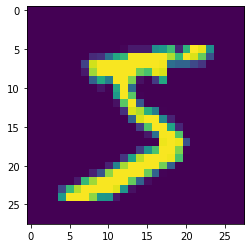

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

In [4]:
print(classifications[0])
print(y_test[0])

[2.6111595e-08 1.6278369e-09 3.7067684e-07 2.5535419e-04 1.8643066e-13
 3.7844768e-07 1.7212765e-14 9.9973446e-01 3.6817298e-07 9.0718377e-06]
7


1


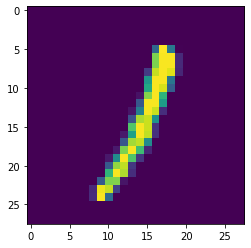

In [5]:
plt.imshow(x_train[99])
print(y_train[99])

In [6]:
print(classifications[99])
print(y_test[99])

[1.8356584e-10 3.2989050e-14 2.5069417e-11 1.3072470e-07 5.7893338e-08
 5.0645960e-11 4.7453788e-14 6.3239057e-08 2.2751473e-10 9.9999976e-01]
9


So, wrong twice in a row. Looks like this model isn't doing too hot on the test data, despite the 99% accuracy.